# 5 Лабораторная: Pipeline

## *Взят набор данных: "О покупательских намерениях онлайн-покупателей"*

#### Набор данных состоит из *10 числовых и 8 категориальных* атрибутов.

Атрибут *«Доход»* можно использовать в качестве метки класса.

*«Административные», «Продолжительность административных», «Информационные», «Продолжительность информационных», «Связанные с продуктом» и «Продолжительность связанных с продуктом»* — это количество различных типов страниц, которые посетитель просматривал в течение сеанса, и общее время, проведенное на каждой из этих категорий страниц.

Значения этих показателей определяются на основе информации об URL-адресах страниц, которые посещал пользователь, и обновляются в режиме реального времени, когда пользователь совершает какое-либо действие, например переходит с одной страницы на другую.

Функции *«Показатель отказов», «Показатель выходов» и «Ценность страницы» представляют собой метрики, измеряемые «Google Аналитикой»* для каждой страницы сайта электронной коммерции.

Значение функции *«Показатель отказов»* для веб-страницы — это процент посетителей, которые заходят на сайт с этой страницы, а затем покидают его («отказываются») без отправки каких-либо других запросов на сервер аналитики в течение этого сеанса.

Значение функции *«Коэффициент выхода»* для конкретной веб-страницы рассчитывается как процентное соотношение всех просмотров страницы, которые были последними в сеансе.

Функция *«Ценность страницы»* представляет собой среднее значение ценности веб-страницы, которую пользователь посетил перед совершением покупки в интернет-магазине.

Функция *«Особый день»* указывает на близость времени посещения сайта к особому дню (например, Дню матери, Дню святого Валентина), когда сеансы с большей вероятностью завершатся транзакцией. Значение этого атрибута определяется с учетом динамики электронной коммерции, например продолжительности периода между датой оформления заказа и датой доставки. Например, для дня Святого Валентина это значение принимает ненулевое значение в период со 2 по 12 февраля, нулевое значение до и после этой даты, если только она не приближается к другому особому дню, и его максимальное значение, равное 1, приходится на 8 февраля.

Набор данных также включает *операционную систему, браузер, регион, тип трафика, тип посетителя как возвращающегося или нового посетителя, логическое значение, указывающее, является ли дата посещения выходным днем, и месяц года*.

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Начальный анализ данных

Рассмотрим датасет подробнее:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Почти все данные представленны в числовом варианте, из категориальных только *Месяц и Тип посетителя*, рассмотрим их подробнее

In [4]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

Среди данных колонки *Month* нет неверных данных, только названия месяцев, потому мы закадируем колонку числами месяцев.

In [5]:
df['Month'] = df['Month'].map({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})

In [6]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

Среди данных колонки *VisitorType* мы видим 3 основных значения: Вернувшийся пользователь, новый пользователь и другие (предположительно это как не зарегистрировавшийся пользователь).

In [7]:
df['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

В основном все пользователи вернувшиеся, других в этом сравнении очень мало, потому мы отнесём их к вернувшимсяч пользователям (возможно они как-то взаимодействовали с сайтом ранее), и перекодируем колонку в 0 и 1.

In [8]:
df['VisitorType'] = df['VisitorType'].replace(
    {'Other': 'Returning_Visitor'}
)

In [9]:
df['VisitorType'] = df['VisitorType'].map({
    'New_Visitor': 0,
    'Returning_Visitor': 1
})

Теперь рассмотрим булевые колонки и превратим их в числовые (0 и 1)

In [10]:
df['Weekend'].value_counts()

Weekend
False    9462
True     2868
Name: count, dtype: int64

In [11]:
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [12]:
df['Weekend'] = df['Weekend'].astype('int')
df['Revenue'] = df['Revenue'].astype('int')

## Корреляция данных

Рассмотрим как признаки коррелируют между собой

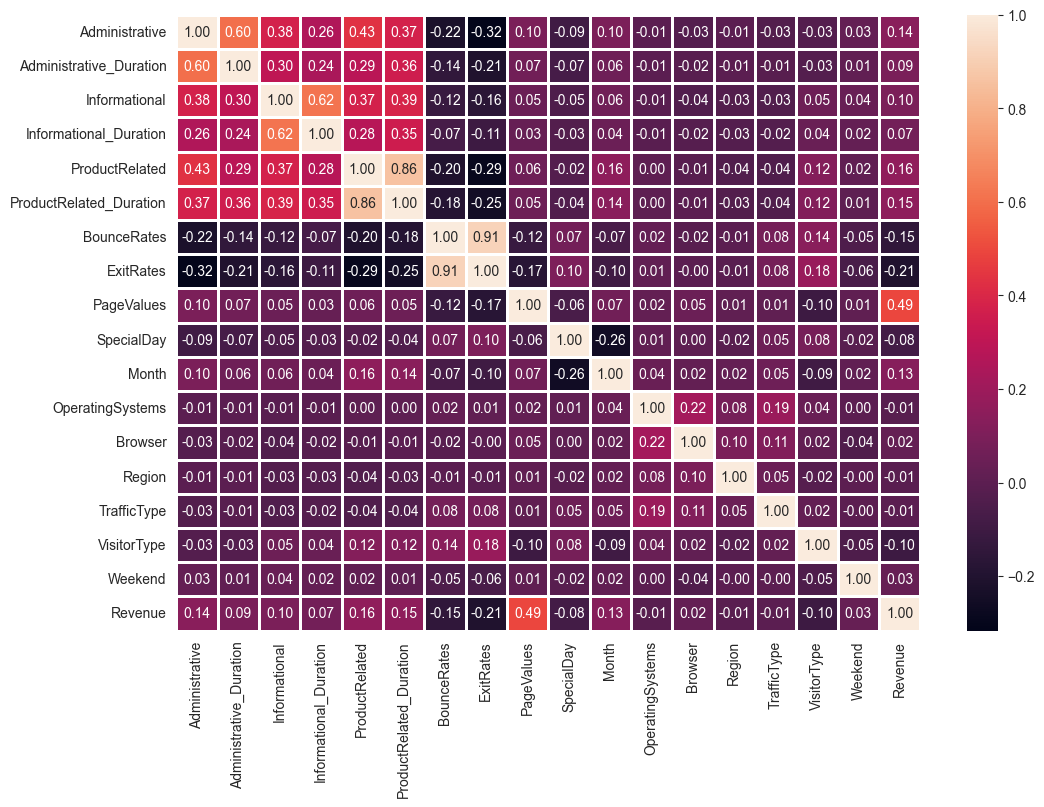

In [13]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=1)
plt.show()

Первые 6 признаков хорошо коррелируют между собой (Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration).

Тут также можно отметить хорошую корреляцию BounceRates и ExitRates.

С нашим целевым признаком лучше всего коррелирует PageValues (*«Ценность страницы»* представляет собой среднее значение ценности веб-страницы, которую пользователь посетил перед совершением покупки в интернет-магазине.)

При этом месяц или выходной день слабо с чем либо коррелируют, как и с целевой переменной, так же как регион, браузер и др.

----

Мы знаем, что наш датасет несбалансированный:

*Из 12 330 сеансов, представленных в наборе данных, 84,5 % (10 422) были примерами отрицательного класса, которые не заканчивались покупкой, а остальные (1908) были примерами положительного класса, которые заканчивались*

Потому мы уровняем кол-во отрицательного класса с положительным:

In [14]:
df['Revenue'].value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

In [15]:
df = pd.concat([
    df[df['Revenue'] == False].sample(2000),
    df[df['Revenue'] == True]
])
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5033,0,0.000000,0,0.00,26,781.500000,0.007692,0.030769,0.000000,0.2,5,2,2,2,3,1,0,0
1916,0,0.000000,0,0.00,24,1268.000000,0.012500,0.015278,0.000000,0.0,3,4,1,3,2,1,1,0
1158,0,0.000000,0,0.00,11,315.600000,0.000000,0.018182,0.000000,0.0,3,1,1,6,3,1,1,0
6538,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.0,6,3,2,3,13,1,0,0
3572,0,0.000000,0,0.00,7,99.700000,0.000000,0.014286,0.000000,0.2,5,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,6,133.466667,0,0.00,44,2664.445833,0.002041,0.010884,97.860836,0.0,11,2,2,1,3,1,1,1
12276,7,139.575000,0,0.00,30,986.500000,0.000000,0.011429,36.392861,0.0,12,2,10,1,2,0,0,1
12311,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,11,2,2,1,2,1,0,1
12312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,11,2,5,1,2,1,1,1


Теперь попробуем вывести новую корреляцию с уменьшенным объёмом отрицательного класса

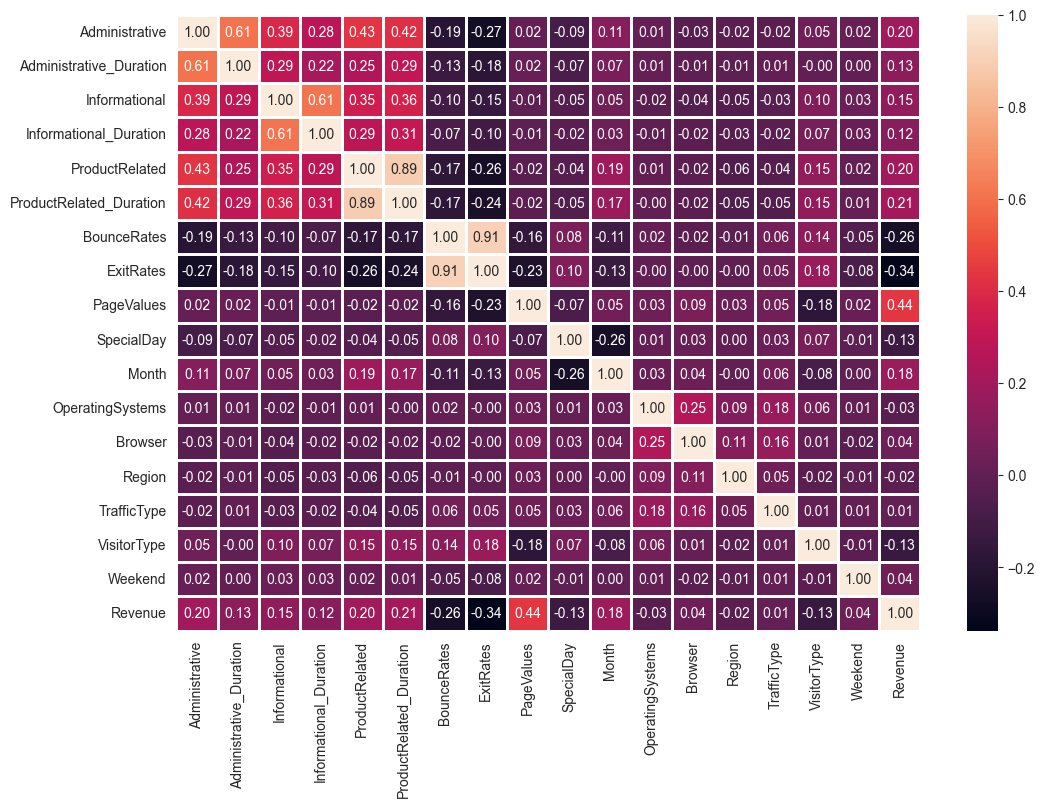

In [16]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=1)
plt.show()

Благодаря уравнению классов можно заметить, что некоторые признаки стали более явно коррелировать с целевым признаком, но некоторые остались так же низкокоррелируемые.

## Важность признаков

Теперь рассмотрим важность признаков, перед непосредственным решением о удалении

Разделим датасет на X и y с целевым признаком

In [17]:
X = df.drop(columns=['Revenue'])
y = df['Revenue']

Оценим важность признаков с помощью RandomForestRegressor

In [18]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X, y)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
8,PageValues,0.529407
10,Month,0.079072
5,ProductRelated_Duration,0.069484
4,ProductRelated,0.052582
7,ExitRates,0.051360
1,Administrative_Duration,0.044819
6,BounceRates,0.038726
0,Administrative,0.024730
14,TrafficType,0.022014
13,Region,0.021101


Оценим важность признаков с помощью GradientBoostingRegressor

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting.fit(X, y)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gradient_boosting.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
8,PageValues,0.767287
10,Month,0.101268
5,ProductRelated_Duration,0.032648
4,ProductRelated,0.027000
6,BounceRates,0.015603
0,Administrative,0.014181
7,ExitRates,0.009974
1,Administrative_Duration,0.009575
3,Informational_Duration,0.004789
14,TrafficType,0.004583


Меньше всего у нас влияют на модель в обоих случаях колонки: SpecialDay, Weekend, VisitorType, OperatingSystems. Потому попробуем их удалить и посмотреть как изменятся модели

In [20]:
df_dr = df.drop(columns=['SpecialDay', 'Weekend', 'VisitorType', 'OperatingSystems', 'Browser', 'Region', 'Informational'])
df_dr

,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,TrafficType,Revenue
5033,0,0.000000,0.00,26,781.500000,0.007692,0.030769,0.000000,5,3,0
1916,0,0.000000,0.00,24,1268.000000,0.012500,0.015278,0.000000,3,2,0
1158,0,0.000000,0.00,11,315.600000,0.000000,0.018182,0.000000,3,3,0
6538,0,0.000000,0.00,1,0.000000,0.200000,0.200000,0.000000,6,13,0
3572,0,0.000000,0.00,7,99.700000,0.000000,0.014286,0.000000,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
12272,6,133.466667,0.00,44,2664.445833,0.002041,0.010884,97.860836,11,3,1
12276,7,139.575000,0.00,30,986.500000,0.000000,0.011429,36.392861,12,2,1
12311,1,0.000000,211.25,144,4627.489571,0.001361,0.020664,0.000000,11,2,1
12312,7,150.357143,9.00,221,11431.001240,0.011149,0.021904,1.582473,11,2,1


----
## Обучение моделей

Импортируем библиотеки

In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

Делим на тренировочную и тестовую выборки

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучаем модели

Создаём функцию для обучения и оценки моделей

In [23]:
def train_and_evaluate_models(classifiers, x_train, y_train, x_test, y_test):
    for name, model in classifiers.items():
        print(f"Обучение модели: {name}")

        # Обучение модели
        model.fit(x_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(x_test)

        # Матрица ошибок
        cm = confusion_matrix(y_test, y_pred)
        print(f"Матрица ошибок для {name}:\n{cm}")

        # Визуализация матрицы ошибок
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.title(f"Матрица ошибок для {name}")
        plt.xlabel("Предсказано")
        plt.ylabel("Истинное значение")
        plt.show()

        # Подробный отчёт о метриках
        print("Отчёт классификации:")
        print(classification_report(y_test, y_pred))
        print("-" * 50)

Создаём classifiers с нужными нам моделями

In [24]:
classifiers = {
    "Random Forest Classifier": RandomForestClassifier(max_depth = 7, n_estimators=100, random_state=42),  # Метод случайного леса

    "Gradient Boosting Classifier": GradientBoostingClassifier(learning_rate = 0.05, max_depth = 3, n_estimators = 130, random_state = 42),  # Метод градиентного бустинга
}

Обучение моделей

Обучение модели: Random Forest Classifier
Матрица ошибок для Random Forest Classifier:
[[366  50]
 [ 60 306]]


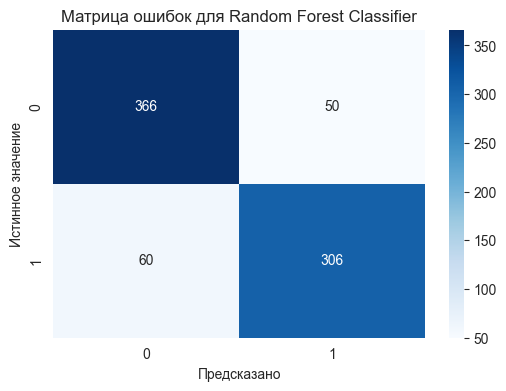

Отчёт классификации:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       416
           1       0.86      0.84      0.85       366

    accuracy                           0.86       782
   macro avg       0.86      0.86      0.86       782
weighted avg       0.86      0.86      0.86       782

--------------------------------------------------
Обучение модели: Gradient Boosting Classifier
Матрица ошибок для Gradient Boosting Classifier:
[[360  56]
 [ 56 310]]


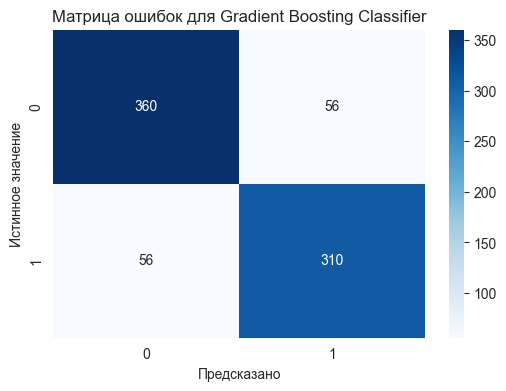

Отчёт классификации:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       416
           1       0.85      0.85      0.85       366

    accuracy                           0.86       782
   macro avg       0.86      0.86      0.86       782
weighted avg       0.86      0.86      0.86       782

--------------------------------------------------


In [25]:
train_and_evaluate_models(classifiers, X_train, y_train, X_test, y_test)

Теперь проверим на датасете с удалёнными колонками

In [26]:
X = df_dr.drop(columns=['Revenue'])
y = df_dr['Revenue']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучение модели: Random Forest Classifier
Матрица ошибок для Random Forest Classifier:
[[366  50]
 [ 57 309]]


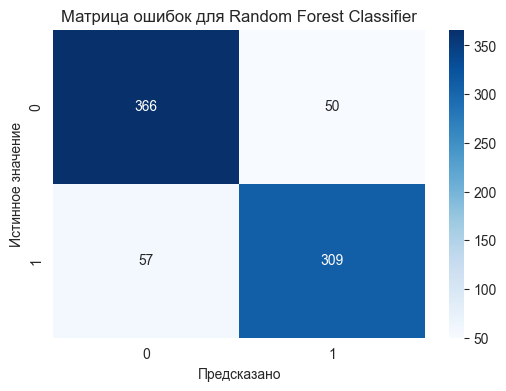

Отчёт классификации:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       416
           1       0.86      0.84      0.85       366

    accuracy                           0.86       782
   macro avg       0.86      0.86      0.86       782
weighted avg       0.86      0.86      0.86       782

--------------------------------------------------
Обучение модели: Gradient Boosting Classifier
Матрица ошибок для Gradient Boosting Classifier:
[[361  55]
 [ 55 311]]


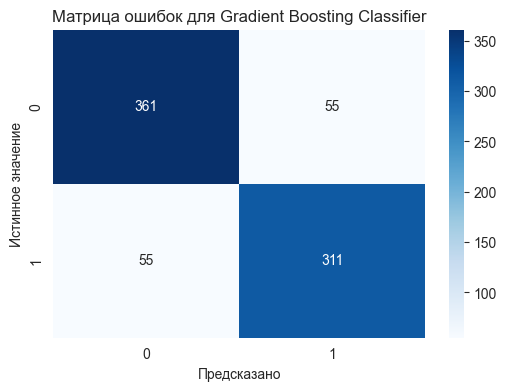

Отчёт классификации:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       416
           1       0.85      0.85      0.85       366

    accuracy                           0.86       782
   macro avg       0.86      0.86      0.86       782
weighted avg       0.86      0.86      0.86       782

--------------------------------------------------


In [28]:
train_and_evaluate_models(classifiers, X_train, y_train, X_test, y_test)

После удаления точность сильно не поменялась, в зависимости от признаков точность колеблется в размере 1-2%

И рандомный лес и градиентный бустинг справились достаточно хорошо свыше 85% точности, однако если попробовать подобрать оптимальные параметры, то возможно улучшение точности модели.